In [11]:

import os, random
import numpy as np
import tensorflow as tf

BASE_PATH = 'A:\github\ML_DL_Learning\Dataset-224'

# Safety checks
assert os.path.exists(BASE_PATH), f"Base path not found: {BASE_PATH}"

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32    # increase/decrease depending on GPU memory
CLASSES = ['Book', 'Khata']   # force class order
print("BASE_PATH:", BASE_PATH)
print("IMG_SIZE:", IMG_SIZE, "BATCH_SIZE:", BATCH_SIZE)
print("CLASSES:", CLASSES)


BASE_PATH: A:\github\ML_DL_Learning\Dataset-224
IMG_SIZE: (224, 224) BATCH_SIZE: 32
CLASSES: ['Book', 'Khata']


<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Hp\AppData\Local\Temp\ipykernel_9088\3952864555.py:5: SyntaxWarning: invalid escape sequence '\g'
  BASE_PATH = 'A:\github\ML_DL_Learning\Dataset-224'


In [12]:


print("\n FOLDER STRUCTURE CHECK:")
for split in ['Train', 'Val', 'Test']:
    split_path = os.path.join(BASE_PATH, split)
    print(f"\n {split}/ -> {split_path}")
    if os.path.exists(split_path):
        folders = sorted([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])
        for folder in folders:
            folder_path = os.path.join(split_path, folder)
            files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg','.jpeg','.png','.bmp'))]
            print(f"   ├── {folder}/  ({len(files)} images)")
            for f in files[:2]:
                print(f"   │   └── {f}")
    else:
        print("   PATH NOT FOUND")



 FOLDER STRUCTURE CHECK:

 Train/ -> A:\github\ML_DL_Learning\Dataset-224\Train
   ├── Book/  (252 images)
   │   └── book_image_100.jpg
   │   └── book_image_102.jpg
   ├── Khata/  (250 images)
   │   └── khata_image_10.jpg
   │   └── khata_image_102.jpg

 Val/ -> A:\github\ML_DL_Learning\Dataset-224\Val
   ├── Book/  (101 images)
   │   └── book_image_1.jpg
   │   └── book_image_10.jpg
   ├── Khata/  (100 images)
   │   └── khata_image_101.jpg
   │   └── khata_image_107.jpg

 Test/ -> A:\github\ML_DL_Learning\Dataset-224\Test
   ├── Book/  (152 images)
   │   └── book_image_101.jpg
   │   └── book_image_11.jpg
   ├── Khata/  (150 images)
   │   └── khata_image_1.jpg
   │   └── khata_image_100.jpg


<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Hp\AppData\Local\Temp\ipykernel_9088\3759843284.py:5: SyntaxWarning: invalid escape sequence '\g'
  base_path = "A:\github\ML_DL_Learning\Dataset-224"


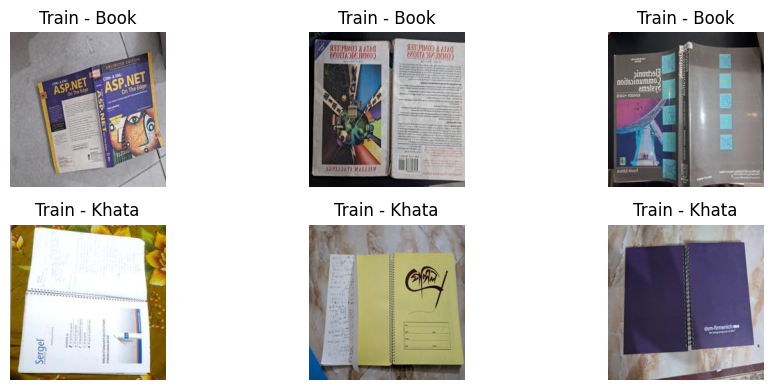

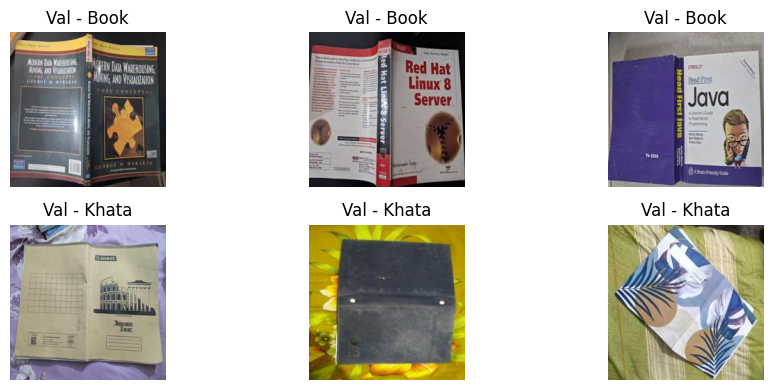

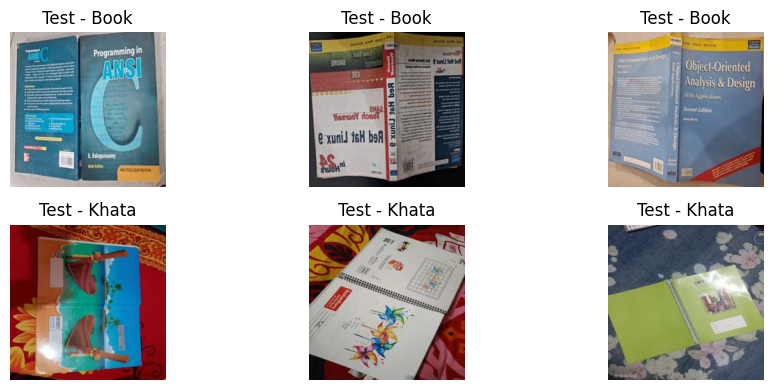

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths
base_path = "A:\github\ML_DL_Learning\Dataset-224"
splits = ['Train', 'Val', 'Test']
classes = ['Book', 'Khata']

# Helper function to plot sample images
def show_samples(base_path, split, classes, num_samples=3):
    plt.figure(figsize=(10, 4))
    for i, cls in enumerate(classes):
        folder = os.path.join(base_path, split, cls)
        images = os.listdir(folder)
        samples = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(samples):
            img_path = os.path.join(folder, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(classes), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{split} - {cls}")
    plt.tight_layout()
    plt.show()

# Show random samples from each split
for split in splits:
    show_samples(base_path, split, classes)


In [14]:
# Data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    seed=SEED,
    classes=CLASSES
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=SEED,
    classes=CLASSES
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=SEED,
    classes=CLASSES
)

# quick summary
print("\nTrain samples:", train_generator.samples)
print("Val samples:", val_generator.samples)
print("Test samples:", test_generator.samples)
print("Class indices:", train_generator.class_indices)
print("Class distribution (train):", np.bincount(train_generator.classes))


Found 502 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 302 images belonging to 2 classes.

Train samples: 502
Val samples: 201
Test samples: 302
Class indices: {'Book': 0, 'Khata': 1}
Class distribution (train): [252 250]


In [15]:
# Verify class indices consistency
print("Train indices:", train_generator.class_indices)
print("Val   indices:", val_generator.class_indices)
print("Test  indices:", test_generator.class_indices)

if (train_generator.class_indices == val_generator.class_indices == test_generator.class_indices):
    print("CLASS INDICES MATCH")
else:
    print("CLASS INDICES DO NOT MATCH - check 'classes' ordering in flow_from_directory")

Train indices: {'Book': 0, 'Khata': 1}
Val   indices: {'Book': 0, 'Khata': 1}
Test  indices: {'Book': 0, 'Khata': 1}
CLASS INDICES MATCH


In [16]:
#  Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 8,028,417 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint1 = ModelCheckpoint('best_model_phase1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop1  = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max', verbose=1)
reduce_lr   = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7, verbose=1)


In [18]:
# Phase 1 training (frozen base)
EPOCHS_PHASE1 = 15

history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=[checkpoint1, earlystop1, reduce_lr],
    verbose=1
)


a:\github\ML_DL_Learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7451 - loss: 2.3567
Epoch 1: val_accuracy improved from None to 0.81095, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7869 - loss: 2.0210 - val_accuracy: 0.8109 - val_loss: 1.8085 - learning_rate: 0.0010
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9126 - loss: 0.7141
Epoch 2: val_accuracy improved from 0.81095 to 0.93532, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9004 - loss: 0.6196 - val_accuracy: 0.9353 - val_loss: 0.2046 - learning_rate: 0.0010
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.9011 - loss: 0.2704
Epoch 3: val_accuracy did not improve from 0.93532
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9183 - loss: 0.2626 - val_accuracy: 0.9353 - val_loss: 0.1930 - learning_rate: 0.0010
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9230 - loss: 0.1910
Epoch 4: val_accuracy did not improve from 0.93532
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9263 - loss: 0.1879 - val_accuracy: 0.9303 - val_loss: 0.1408 - learning_rate: 0.0010
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.9284 - loss: 0.2398
Epoch 5: val_accuracy improved from 0.93532 to 0.94030, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9363 - loss: 0.2176 - val_accuracy: 0.9403 - val_loss: 0.1196 - learning_rate: 0.0010
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.9337 - loss: 0.1618
Epoch 6: val_accuracy did not improve from 0.94030
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9343 - loss: 0.1705 - val_accuracy: 0.9353 - val_loss: 0.1180 - learning_rate: 0.0010
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.9204 - loss: 0.2275
Epoch 7: val_accuracy improved from 0.94030 to 0.94527, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9243 - loss: 0.2043 - val_accuracy: 0.9453 - val_loss: 0.1194 - learning_rate: 0.0010
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.9636 - loss: 0.1048
Epoch 8: val_accuracy did not improve from 0.94527
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9522 - loss: 0.1275 - val_accuracy: 0.9353 - val_loss: 0.1205 - learning_rate: 0.0010
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.9474 - loss: 0.1331
Epoch 9: val_accuracy improved from 0.94527 to 0.95522, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9422 - loss: 0.1346 - val_accuracy: 0.9552 - val_loss: 0.0917 - learning_rate: 0.0010
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.9378 - loss: 0.1844
Epoch 10: val_accuracy improved from 0.95522 to 0.97512, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9562 - loss: 0.1492 - val_accuracy: 0.9751 - val_loss: 0.0919 - learning_rate: 0.0010
Epoch 11/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.9571 - loss: 0.1110
Epoch 11: val_accuracy did not improve from 0.97512
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9562 - loss: 0.1090 - val_accuracy: 0.9751 - val_loss: 0.0706 - learning_rate: 0.0010
Epoch 12/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.9615 - loss: 0.1450
Epoch 12: val_accuracy did not improve from 0.97512
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9661 - loss: 0.1048 - val_accuracy: 0.9552 - val_loss: 0.1062 - learning_rate: 0.0010
Epoch 13/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.9721 - loss: 0.0648
Epoch 13: val_accuracy did not improve from 0.97512
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9681 - loss: 0.0794 - val_accuracy: 0.9602 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 14/15
16/16 ━━━━━━━━━

In [19]:
# Unfreeze & fine-tune
# Unfreeze last 30 layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile with a lower LR
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint2 = ModelCheckpoint('best_model_phase2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop2  = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, mode='max', verbose=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 9,554,817 (36.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [20]:
# Phase 2 training (fine-tune)
EPOCHS_PHASE2 = 25

history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1 + EPOCHS_PHASE2,  # total epochs value (not strictly needed)
    initial_epoch=len(history1.history['loss']),
    callbacks=[checkpoint2, earlystop2, reduce_lr],
    verbose=1
)

Epoch 16/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8406 - loss: 0.7402
Epoch 16: val_accuracy improved from None to 0.95522, saving model to best_model_phase2.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8785 - loss: 0.4779 - val_accuracy: 0.9552 - val_loss: 0.1025 - learning_rate: 1.0000e-04
Epoch 17/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9289 - loss: 0.2683
Epoch 17: val_accuracy did not improve from 0.95522
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9542 - loss: 0.1669 - val_accuracy: 0.9502 - val_loss: 0.1077 - learning_rate: 1.0000e-04
Epoch 18/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9549 - loss: 0.1831
Epoch 18: val_accuracy did not improve from 0.95522
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9542 - loss: 0.2399 - val_accuracy: 0.9403 - val_loss: 0.1501 - learning_rate: 1.0000e-04
Epoch 19/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9237 - loss: 0.2533
Epoch 19: val_accuracy improved from 0.95522 to 0.96020, saving model to best_model_phase2.h5



Epoch 19: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9502 - loss: 0.1670 - val_accuracy: 0.9602 - val_loss: 0.0878 - learning_rate: 1.0000e-04
Epoch 20/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9725 - loss: 0.0703
Epoch 20: val_accuracy improved from 0.96020 to 0.98010, saving model to best_model_phase2.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9741 - loss: 0.0688 - val_accuracy: 0.9801 - val_loss: 0.0850 - learning_rate: 5.0000e-05
Epoch 21/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9835 - loss: 0.0623
Epoch 21: val_accuracy did not improve from 0.98010
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9781 - loss: 0.0684 - val_accuracy: 0.9801 - val_loss: 0.0843 - learning_rate: 5.0000e-05
Epoch 22/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9744 - loss: 0.0669
Epoch 22: val_accuracy did not improve from 0.98010
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9721 - loss: 0.0702 - val_accuracy: 0.9801 - val_loss: 0.0795 - learning_rate: 5.0000e-05
Epoch 23/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9725 - loss: 0.0663
Epoch 23: val_accuracy did not improve from 0.98010

Epoch 23: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9741 - loss: 0.0668 - val_accura

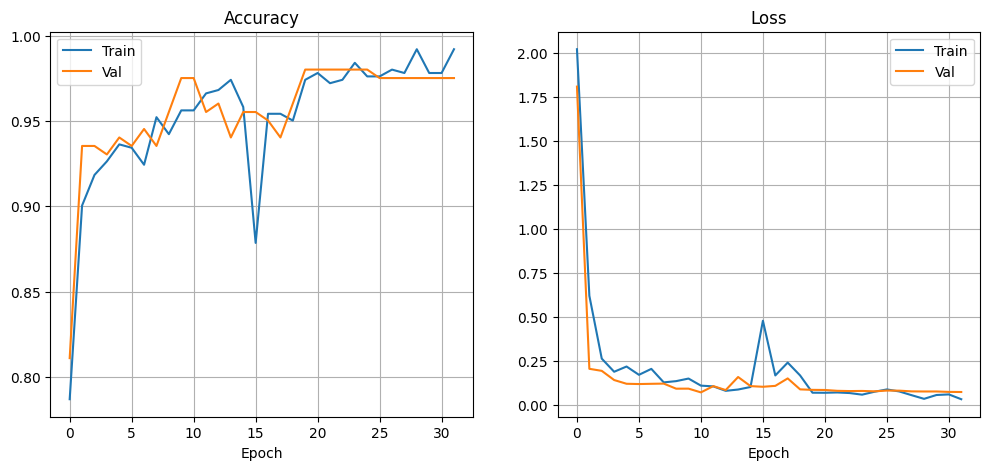

In [21]:
# Merge histories
for k in history1.history:
    history1.history[k].extend(history2.history.get(k, []))
history = history1

# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend(); plt.grid(True)
plt.show()

In [26]:
# Test evaluation & detailed report
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_acc*100:.2f}%, Test loss: {test_loss:.4f}")

# predictions
test_generator.reset()
preds = model.predict(test_generator, verbose=0)
pred_classes = (preds > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

print("\nClassification report:")
print(classification_report(true_classes, pred_classes, target_names=class_names))

print("\nConfusion matrix:")
cm = confusion_matrix(true_classes, pred_classes)
print(cm)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.9536 - loss: 0.1151
Test accuracy: 95.36%, Test loss: 0.1151

Classification report:
              precision    recall  f1-score   support

        Book       0.95      0.96      0.95       152
       Khata       0.96      0.95      0.95       150

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302


Confusion matrix:
[[146   6]
 [  8 142]]


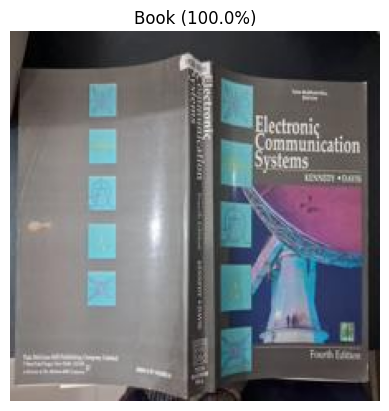

Raw score: 0.0000 → Predicted: Book, Confidence: 100.00%


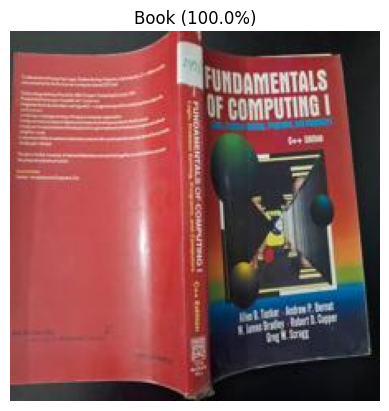

Raw score: 0.0001 → Predicted: Book, Confidence: 99.99%


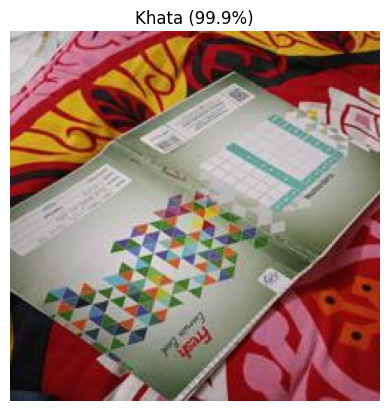

Raw score: 0.9988 → Predicted: Khata, Confidence: 99.88%


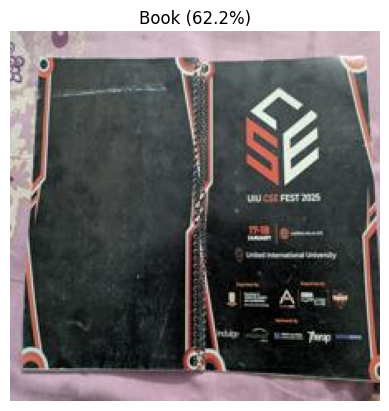

Raw score: 0.3781 → Predicted: Book, Confidence: 62.19%


('Book', np.float32(62.189148))

In [25]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path, model=model, class_names=class_names):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    score = model.predict(arr, verbose=0)[0][0]
    pred = 1 if score > 0.5 else 0
    confidence = score*100 if pred==1 else (1-score)*100
    label = class_names[pred]
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({confidence:.1f}%)")
    plt.show()
    print(f"Raw score: {score:.4f} → Predicted: {label}, Confidence: {confidence:.2f}%")
    return label, confidence

predict_image(BASE_PATH + '\\Test\\Book\\book_image_110.jpg')
predict_image(BASE_PATH + '\\Test\\Book\\book_image_120.jpg')

predict_image(BASE_PATH + '\\Test\\Khata\\khata_image_141.jpg')
predict_image(BASE_PATH + '\\Test\\Khata\\khata_image_160.jpg')